In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline
import pandas as pd

In [2]:
#first checking the accuracy through ANN and then CNN so that we can have comparsion which one is better for IMAGE CLASSIFICATION



In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
#60000 dataset 

<Figure size 1500x200 with 0 Axes>

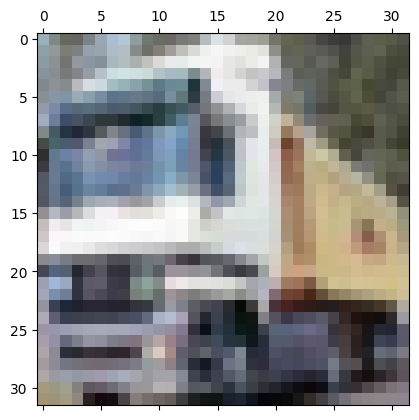

In [6]:
plt.gray
plt.figure(figsize=(15,2))
plt.matshow(X_train[1])

In [7]:
#doing SCALING
X_train = X_train/255
X_test = X_test/255
from tensorflow import keras

In [8]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

C:\Users\Ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 33ms/step - accuracy: 0.3036 - loss: 1.9320
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - accuracy: 0.4184 - loss: 1.6424
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 32ms/step - accuracy: 0.4508 - loss: 1.5546
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.4743 - loss: 1.4891
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.4973 - loss: 1.4347


In [9]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.37      0.47      1000
           1       0.75      0.35      0.48      1000
           2       0.32      0.42      0.36      1000
           3       0.43      0.20      0.27      1000
           4       0.27      0.65      0.38      1000
           5       0.43      0.30      0.35      1000
           6       0.57      0.31      0.40      1000
           7       0.42      0.66      0.51      1000
           8       0.70      0.52      0.60      1000
           9       0.50      0.61      0.55      1000

    accuracy                           0.44     10000
   macro avg       0.50      0.44      0.44     10000
weighted avg       0.50      0.44      0.44     10000



In [10]:
#BUILDING CNN !!!




In [11]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\Ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - accuracy: 0.3746 - loss: 1.7167
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.5902 - loss: 1.1651
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.6508 - loss: 1.0092
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.6856 - loss: 0.9061
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.7046 - loss: 0.8581
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.7221 - loss: 0.7983
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.7435 - loss: 0.7366
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.7540 - loss: 0.6966
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.7717 - loss: 0.6570
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - accuracy: 0.7835 - loss: 0.6220


In [14]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7048 - loss: 0.8976


[0.9145835041999817, 0.7020999789237976]

In [15]:
#the accuracy goes from 0.49 to 0.70 which is quite good


In [21]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([[1.37604569e-04, 1.70189693e-07, 3.33417003e-04, 9.06537950e-01,
        7.00196179e-05, 8.83941799e-02, 2.42817347e-04, 1.43691132e-05,
        4.26633283e-03, 3.09899769e-06],
       [5.13643026e-03, 2.44540691e-01, 1.85509094e-07, 5.31399508e-07,
        1.43960746e-08, 4.57393661e-08, 5.27234434e-09, 5.03102306e-08,
        7.41330624e-01, 8.99145752e-03],
       [9.94778723e-02, 1.86579730e-02, 1.49492058e-03, 4.69364552e-03,
        2.33494490e-03, 5.82145702e-04, 3.29931609e-05, 6.69212220e-03,
        8.60759020e-01, 5.27448533e-03],
       [6.61933362e-01, 4.75134788e-04, 4.09664446e-03, 9.74059221e-04,
        3.45499488e-04, 6.70152258e-06, 1.16539537e-03, 1.04164283e-05,
        3.30960512e-01, 3.23420536e-05],
       [9.96208746e-06, 4.48485080e-04, 1.71562769e-02, 3.92925590e-02,
        4.26356107e-01, 5.29978657e-03, 5.11373222e-01, 2.04117150e-05,
        4.20303295e-05, 1.18981973e-06]], dtype=float32)

In [22]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [23]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [24]:
#through padding, we can have more better convolution